<a href="https://colab.research.google.com/github/redrum88/100-Days-of-Code-Python-Bootcamp/blob/main/day_77_seaborn_and_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [6]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain? ✅
  * 6 columns
  * 5390 rows
2. Are there any NaN values present? `False` ✅
3. Are there any duplicate rows? `0` ✅
4. What are the data types of the columns? **dtypes:** `int64(1)`, `object(5)` ✅

In [7]:
# Check info about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


In [12]:
# Check for NaN's
data.isna().sum()

Rank                     0
Release_Date             0
Movie_Title              0
USD_Production_Budget    0
USD_Worldwide_Gross      0
USD_Domestic_Gross       0
dtype: int64

In [14]:
# Check for NaN's
data.isnull().values.any()

False

In [15]:
data.duplicated().sum()

0

### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. ✅ 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [16]:
data["USD_Production_Budget"] = data["USD_Production_Budget"].str.replace("[\$\,]", "", regex=True)
data["USD_Worldwide_Gross"] = data["USD_Worldwide_Gross"].str.replace("[\$\,]", "", regex=True)
data["USD_Domestic_Gross"] = data["USD_Domestic_Gross"].str.replace("[\$\,]", "", regex=True)
data["USD_Production_Budget"] = pd.to_numeric(data["USD_Production_Budget"])
data["USD_Worldwide_Gross"] = pd.to_numeric(data["USD_Worldwide_Gross"])
data["USD_Domestic_Gross"] = pd.to_numeric(data["USD_Domestic_Gross"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   int64 
 4   USD_Worldwide_Gross    5391 non-null   int64 
 5   USD_Domestic_Gross     5391 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 252.8+ KB


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. ✅

In [17]:
data["Release_Date"] = pd.to_datetime(data["Release_Date"])
data.Release_Date.dtype

dtype('<M8[ns]')

### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
  * `31,113,737.58`
2. What is the average worldwide gross revenue of films?
  * `88,855,421.96`
3. What were the minimums for worldwide and domestic revenue?
  * `0.00` & `0.00`
4. Are the bottom 25% of films actually profitable or do they lose money? 
 * **Profitable**
5. What are the highest production budget and highest worldwide gross revenue of any film?
  * Highest Production Budget: `425,000,000.00`
  * Highest Worldwide Gross Revenue: `2,783,918,982.00`
6. How much revenue did the lowest and highest budget films make?

In [18]:
data.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00","5,391.00","5,391.00","5,391.00"
mean,"2,696.00","31,113,737.58","88,855,421.96","41,235,519.44"
std,"1,556.39","40,523,796.88","168,457,757.00","66,029,346.27"
min,1.00,"1,100.00",0.00,0.00
25%,"1,348.50","5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00","17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50","40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)?✅ What were the highest budget films that grossed nothing?✅

In [20]:
zero_revenue_films = data[data.USD_Domestic_Gross == 0]
len(zero_revenue_films)

512

In [23]:
zero_revenue_films_sorted = zero_revenue_films.sort_values(by='USD_Production_Budget', ascending=False)
zero_revenue_films_sorted.head(15)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
4294,566,2012-12-31,Astérix et Obélix: Au service de Sa Majesté,77600000,60680125,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
5338,879,2017-04-08,The Dark Tower,60000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
4295,1230,2012-12-31,Foodfight!,45000000,73706,0


**Challenge**: How many films grossed $0 worldwide?✅ What are the highest budget films that had no revenue internationally?✅

In [24]:

wordldwide = data[data["USD_Worldwide_Gross"] == 0]
len(wordldwide)

357

In [25]:
zero_revenue_films_sorted = wordldwide.sort_values(by='USD_Production_Budget', ascending=False)
zero_revenue_films_sorted.head(15)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
5338,879,2017-04-08,The Dark Tower,60000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5092,1435,2015-12-31,The Crow,40000000,0,0
3300,1631,2008-12-31,Black Water Transit,35000000,0,0
5045,1656,2015-10-30,Freaks of Nature,33000000,0,0


### Filtering on Multiple Conditions

In [26]:
data.loc[(data.USD_Domestic_Gross == 0) & (data.USD_Worldwide_Gross != 0)]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [27]:
zero_revenue_domestic_wordlwide = data.query("USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0")
zero_revenue_domestic_wordlwide.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).✅
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? `7` ✅
* Create another DataFrame called data_clean that does not include these films. 

In [28]:
not_released = data[data['Release_Date'] > '2018-05-01']
not_released.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0


In [30]:
len(not_released)

7

In [31]:

data_clean = data.drop(not_released.index)

In [32]:
data_clean

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000
...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343


### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? `37.36%` ✅

In [34]:
costs_exceed_revenue = (data['USD_Production_Budget'] > data['USD_Worldwide_Gross']).mean()
percentage = costs_exceed_revenue * 100
percentage

37.3585605639028

# Seaborn for Data Viz: Bubble Charts

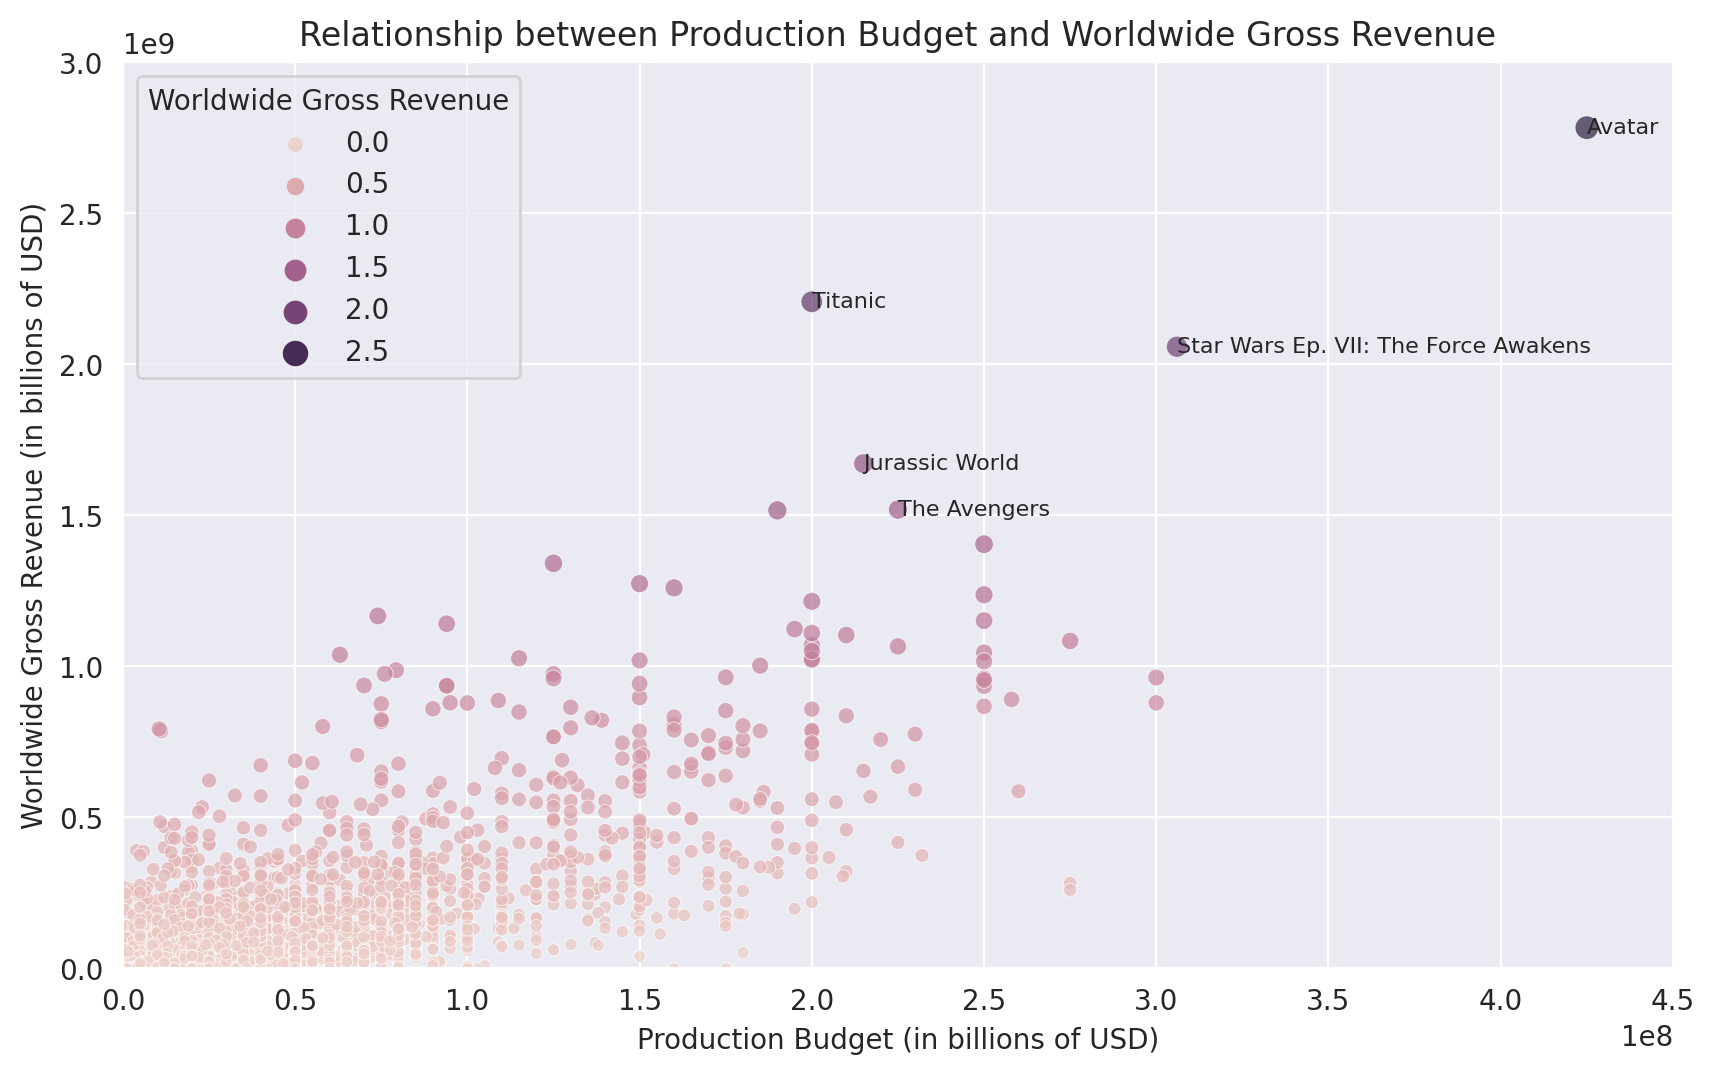

In [36]:
plt.figure(figsize=(10, 6), dpi=200)

# Set style
sns.set_style("darkgrid")

# Create scatter plot
ax = sns.scatterplot(data=data,
                     x="USD_Production_Budget",
                     y="USD_Worldwide_Gross",
                     hue="USD_Worldwide_Gross",
                     size="USD_Worldwide_Gross",
                     alpha=0.7)

# Set Set limits and labels
ax.set(xlim=(0, 450000000),
       ylim=(0, 3000000000),
       xlabel="Production Budget (in billions of USD)",
       ylabel="Worldwide Gross Revenue (in billions of USD)")

# Setup title and legend
plt.title("Relationship between Production Budget and Worldwide Gross Revenue")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc="upper left", title="Worldwide Gross Revenue")

# Add annotations for top 5 gross movies
top_5 = data.sort_values(by="USD_Worldwide_Gross", ascending=False).head(5)
for i, row in top_5.iterrows():
    ax.text(row["USD_Production_Budget"], row["USD_Worldwide_Gross"], row["Movie_Title"],
            fontsize=8, ha="left", va="center")
plt.show();

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



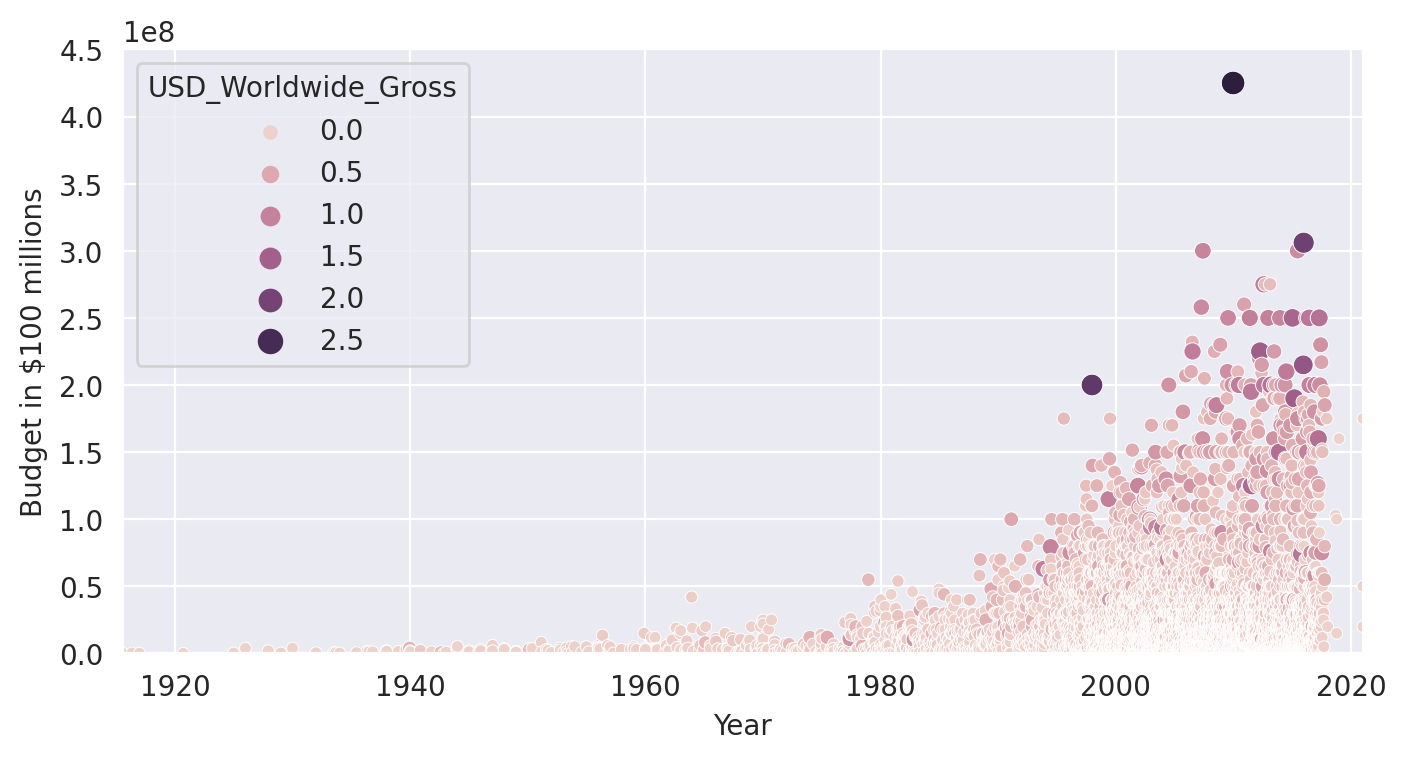

In [37]:
plt.figure(figsize=(8, 4), dpi=200)

with sns.axes_style("darkgrid"):
  ax = sns.scatterplot(data=data,
                      x="Release_Date",
                      y="USD_Production_Budget",
                      hue="USD_Worldwide_Gross",
                      size="USD_Worldwide_Gross",)

  ax.set(ylim=(0, 450000000),
        xlim=(data.Release_Date.min(), data.Release_Date.max()),
        xlabel="Year",
        ylabel="Budget in $100 millions");

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [42]:
# Create a DatetimeIndex object from the Release_Date column
release_dates = pd.DatetimeIndex(data_clean['Release_Date'])

# Get year from the DatetimeIndex and convert to decades
decades = release_dates.year // 10 * 10

# Add decades as a Decade column to the data_clean DataFrame
data_clean['Decade'] = decades
data_clean.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [44]:
# Separate films into "old" and "new" categories based on Decade
old_films = data_clean[data_clean['Decade'] < 1970]
new_films = data_clean[data_clean['Decade'] >= 1970]

# Count the number of films released prior to 1970
num_old_films = len(old_films)
print("Number of films released prior to 1970:", num_old_films)

# Find the most expensive film made prior to 1970
most_expensive_old_film = old_films[old_films['USD_Production_Budget'] == old_films[old_films['Decade'] < 1970]['USD_Production_Budget'].max()]
print("Most expensive film made prior to 1970:", most_expensive_old_film['Movie_Title'].values[0])

Number of films released prior to 1970: 153
Most expensive film made prior to 1970: Cleopatra


# Seaborn Regression Plots

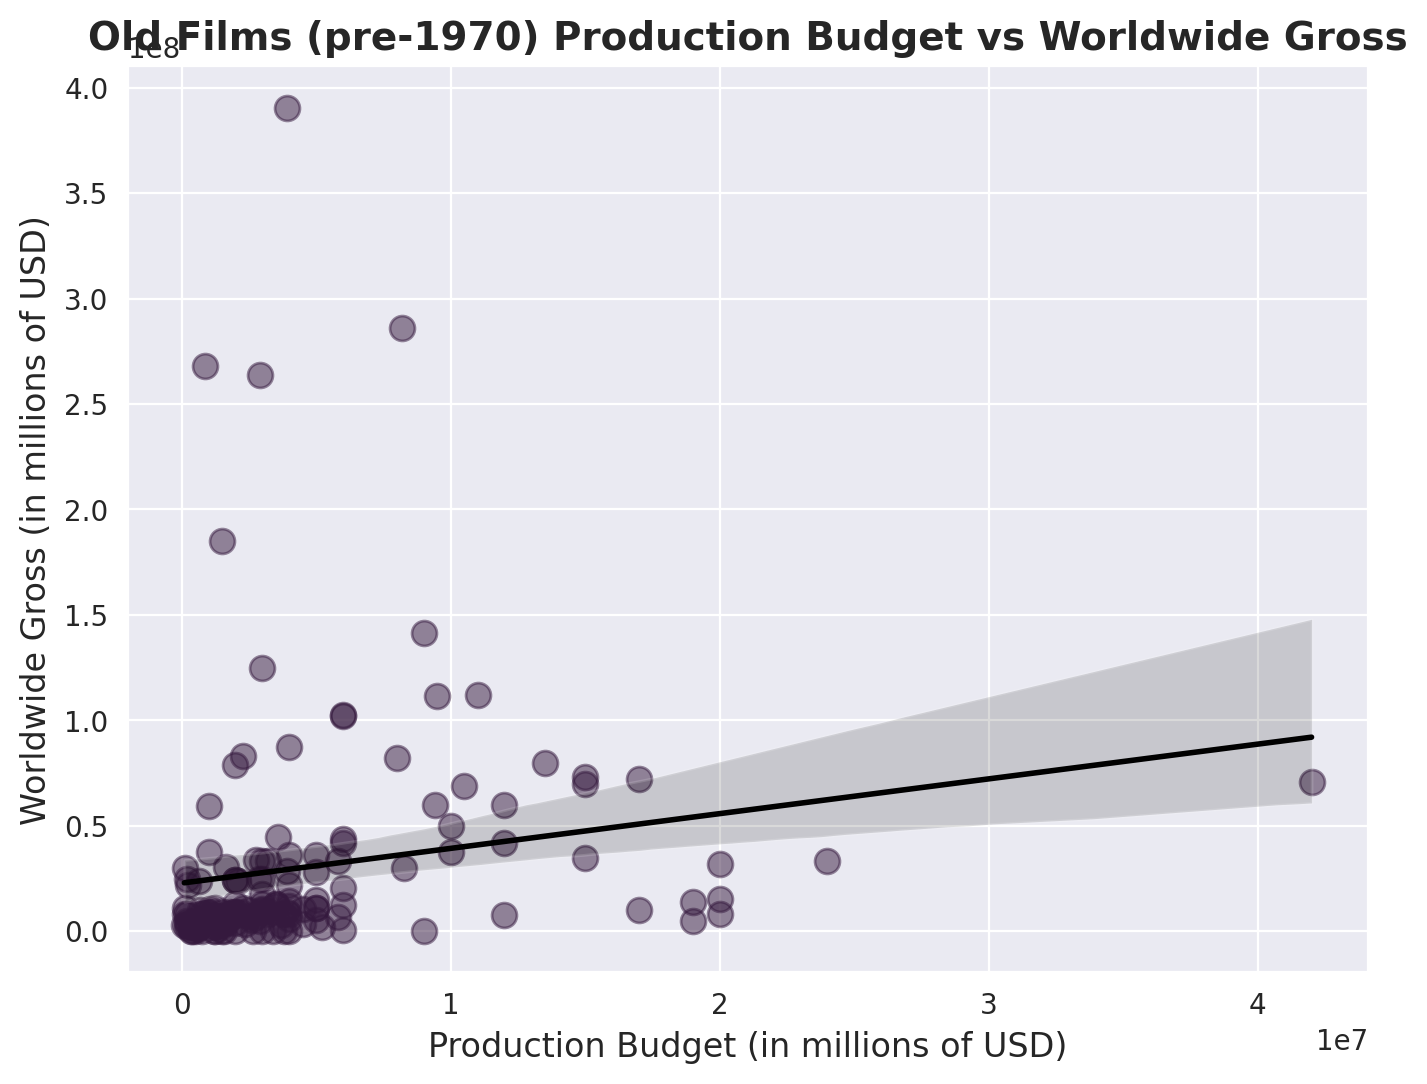

In [47]:
plt.figure(figsize=(8, 6), dpi=200)
sns.set_style("darkgrid")
sns.set_palette("rocket")

# Setup plot
ax = sns.regplot(data=old_films,
                 x="USD_Production_Budget",
                 y="USD_Worldwide_Gross",
                 scatter_kws={"alpha": 0.5, "s": 80},
                 line_kws={"color": "black", "lw": 2})

# Set plot title and labels
ax.set_title("Old Films (pre-1970) Production Budget vs Worldwide Gross", fontsize=14, fontweight='bold')
ax.set_xlabel("Production Budget (in millions of USD)", fontsize=12)
ax.set_ylabel("Worldwide Gross (in millions of USD)", fontsize=12)

# Set tick label font size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show();

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

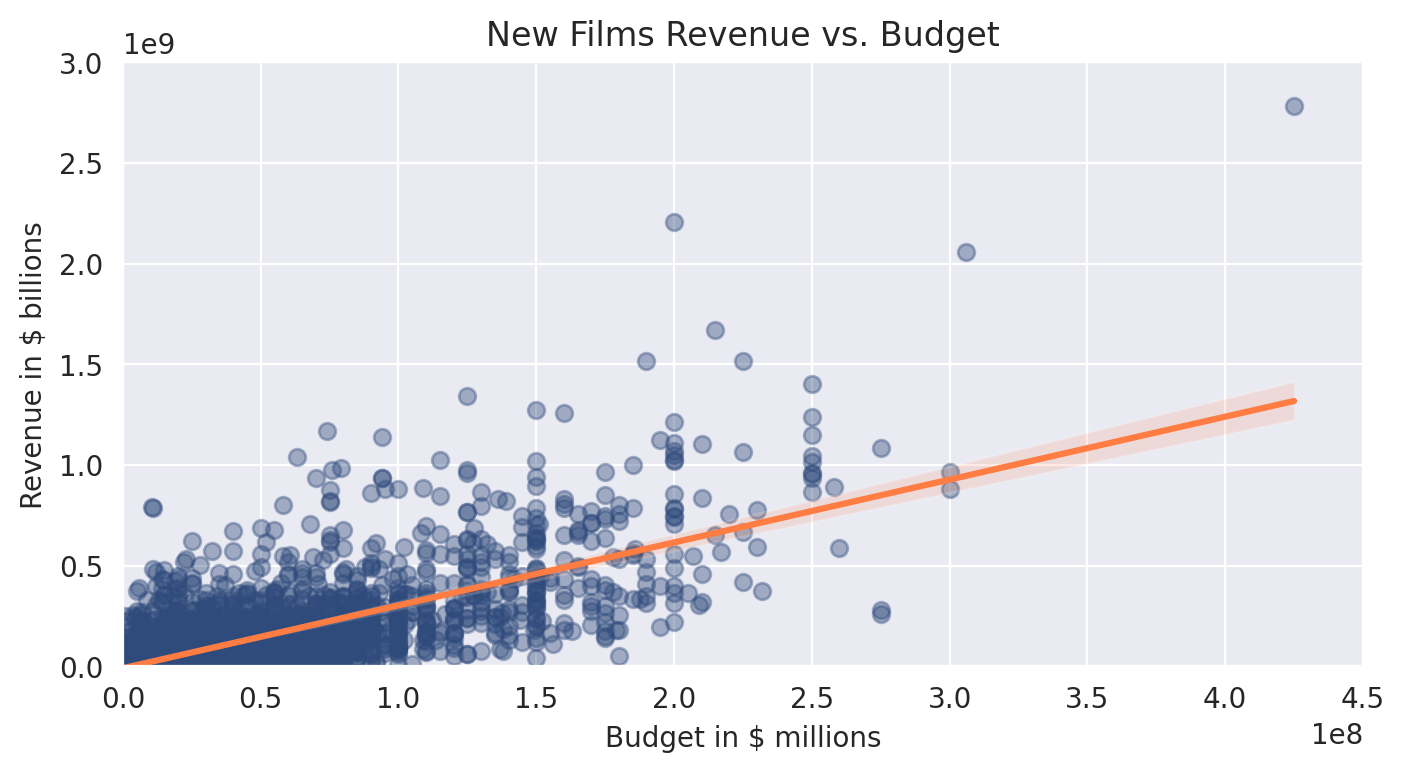

In [48]:
plt.figure(figsize=(8, 4), dpi=200)
sns.set_style("darkgrid")

sns.regplot(data=new_films,
            x="USD_Production_Budget",
            y="USD_Worldwide_Gross",
            color="#2f4b7c",
            scatter_kws={"alpha": 0.4},
            line_kws={"color": "#ff7c43"})

plt.xlim(0, 450000000)
plt.ylim(0, 3000000000)

plt.xlabel("Budget in $ millions")
plt.ylabel("Revenue in $ billions")
plt.title("New Films Revenue vs. Budget")

plt.show()

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [49]:
from sklearn.linear_model import LinearRegression

# Create a new DataFrame with only the features we need
X = data_clean[["USD_Production_Budget"]]
y = data_clean["USD_Worldwide_Gross"]

# Choose estimator
model = LinearRegression()

# Fit model
model.fit(X, y)

# Fit the model to the data
model.fit(X, y)

# Print the model coefficients
print("Intercept: ", model.intercept_)
print("Coefficients: ", model.coef_)

Intercept:  -7572159.917291358
Coefficients:  [3.11043315]


**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Create a new DataFrame with only the features we need
X = old_films[["USD_Production_Budget"]]
y = old_films["USD_Worldwide_Gross"]

# Create the model object
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)



LinearRegression()

In [51]:
# Print the model coefficients
print("Intercept: ", model.intercept_)
print("Slope: ", model.coef_[0])
print("R-Squared: ", r2_score(y, model.predict(X)))

Intercept:  22821538.635080386
Slope:  1.6477131440107315
R-Squared:  0.02937258620576877


# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [60]:
budget = 350000000
revenue_estimate = model.intercept_ + model.coef_[0]*budget
revenue_estimate = round(revenue_estimate, -6)
print(f'The estimated revenue for a film with a budget of ${budget:,} is ${revenue_estimate:,.0f}.')

The estimated revenue for a film with a budget of $350,000,000 is $600,000,000.


In [58]:
budget = 350000000
revenue_estimate = model.predict([[budget]])[0]
print(f"The estimated revenue for a film with a budget of ${budget:,} is ${revenue_estimate:,.0f}\n")

The estimated revenue for a film with a budget of $350,000,000 is $599,521,139



/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
